In [1]:
# Import thư viện

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

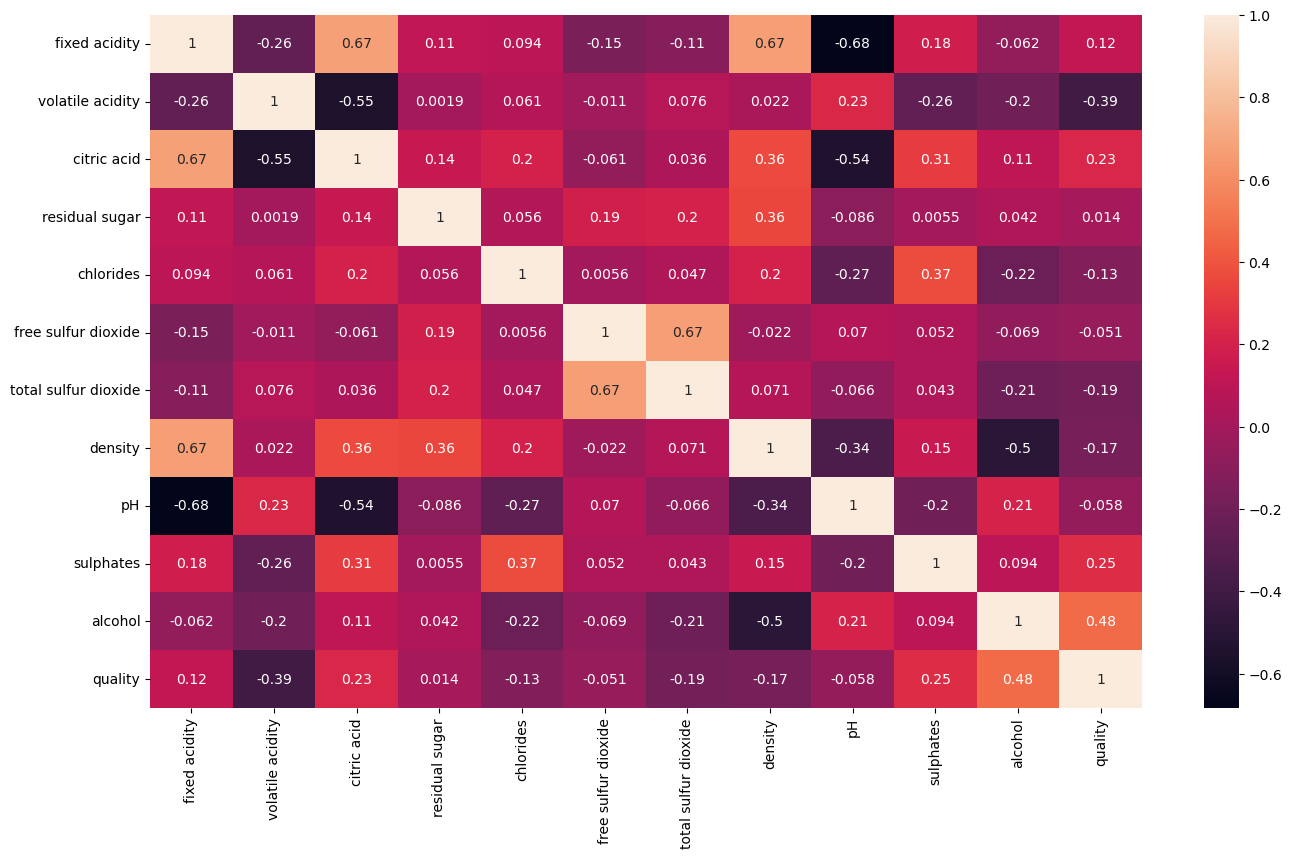

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [6]:
feature = df.drop('quality',axis=1)
label = df['quality']

In [7]:
feature.select_dtypes(exclude=['int64']).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [8]:
feature_onehot = pd.get_dummies(feature,columns=feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

,fixed acidity_4.6,fixed acidity_4.7,fixed acidity_4.9,fixed acidity_5.0,fixed acidity_5.1,fixed acidity_5.2,fixed acidity_5.3,fixed acidity_5.4,fixed acidity_5.5,fixed acidity_5.6,...,alcohol_13.0,alcohol_13.1,alcohol_13.2,alcohol_13.3,alcohol_13.4,alcohol_13.5,alcohol_13.566666666666698,alcohol_13.6,alcohol_14.0,alcohol_14.9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=42)

In [10]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 0.5833333333333334
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.12      0.10        17
           5       0.70      0.66      0.68       195
           6       0.60      0.60      0.60       200
           7       0.43      0.46      0.44        61
           8       0.25      0.17      0.20         6

    accuracy                           0.58       480
   macro avg       0.34      0.33      0.34       480
weighted avg       0.59      0.58      0.59       480



In [12]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.5833333333333334')

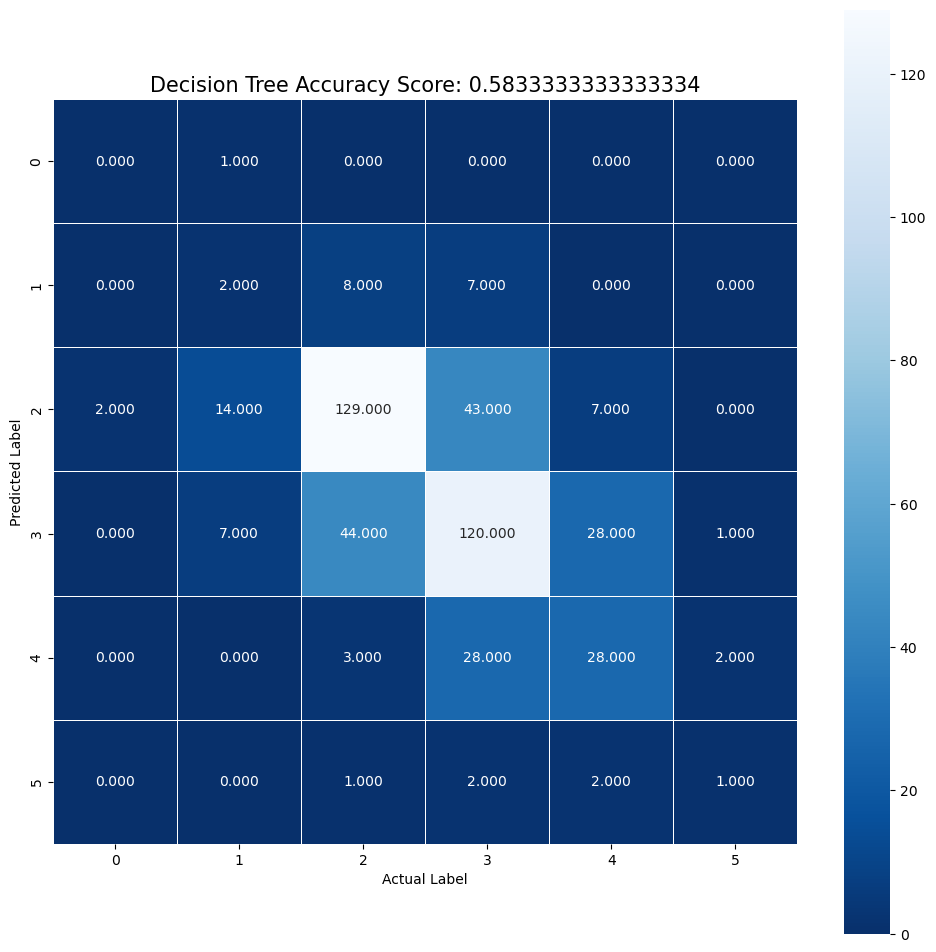

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
title ='Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title,size=15)

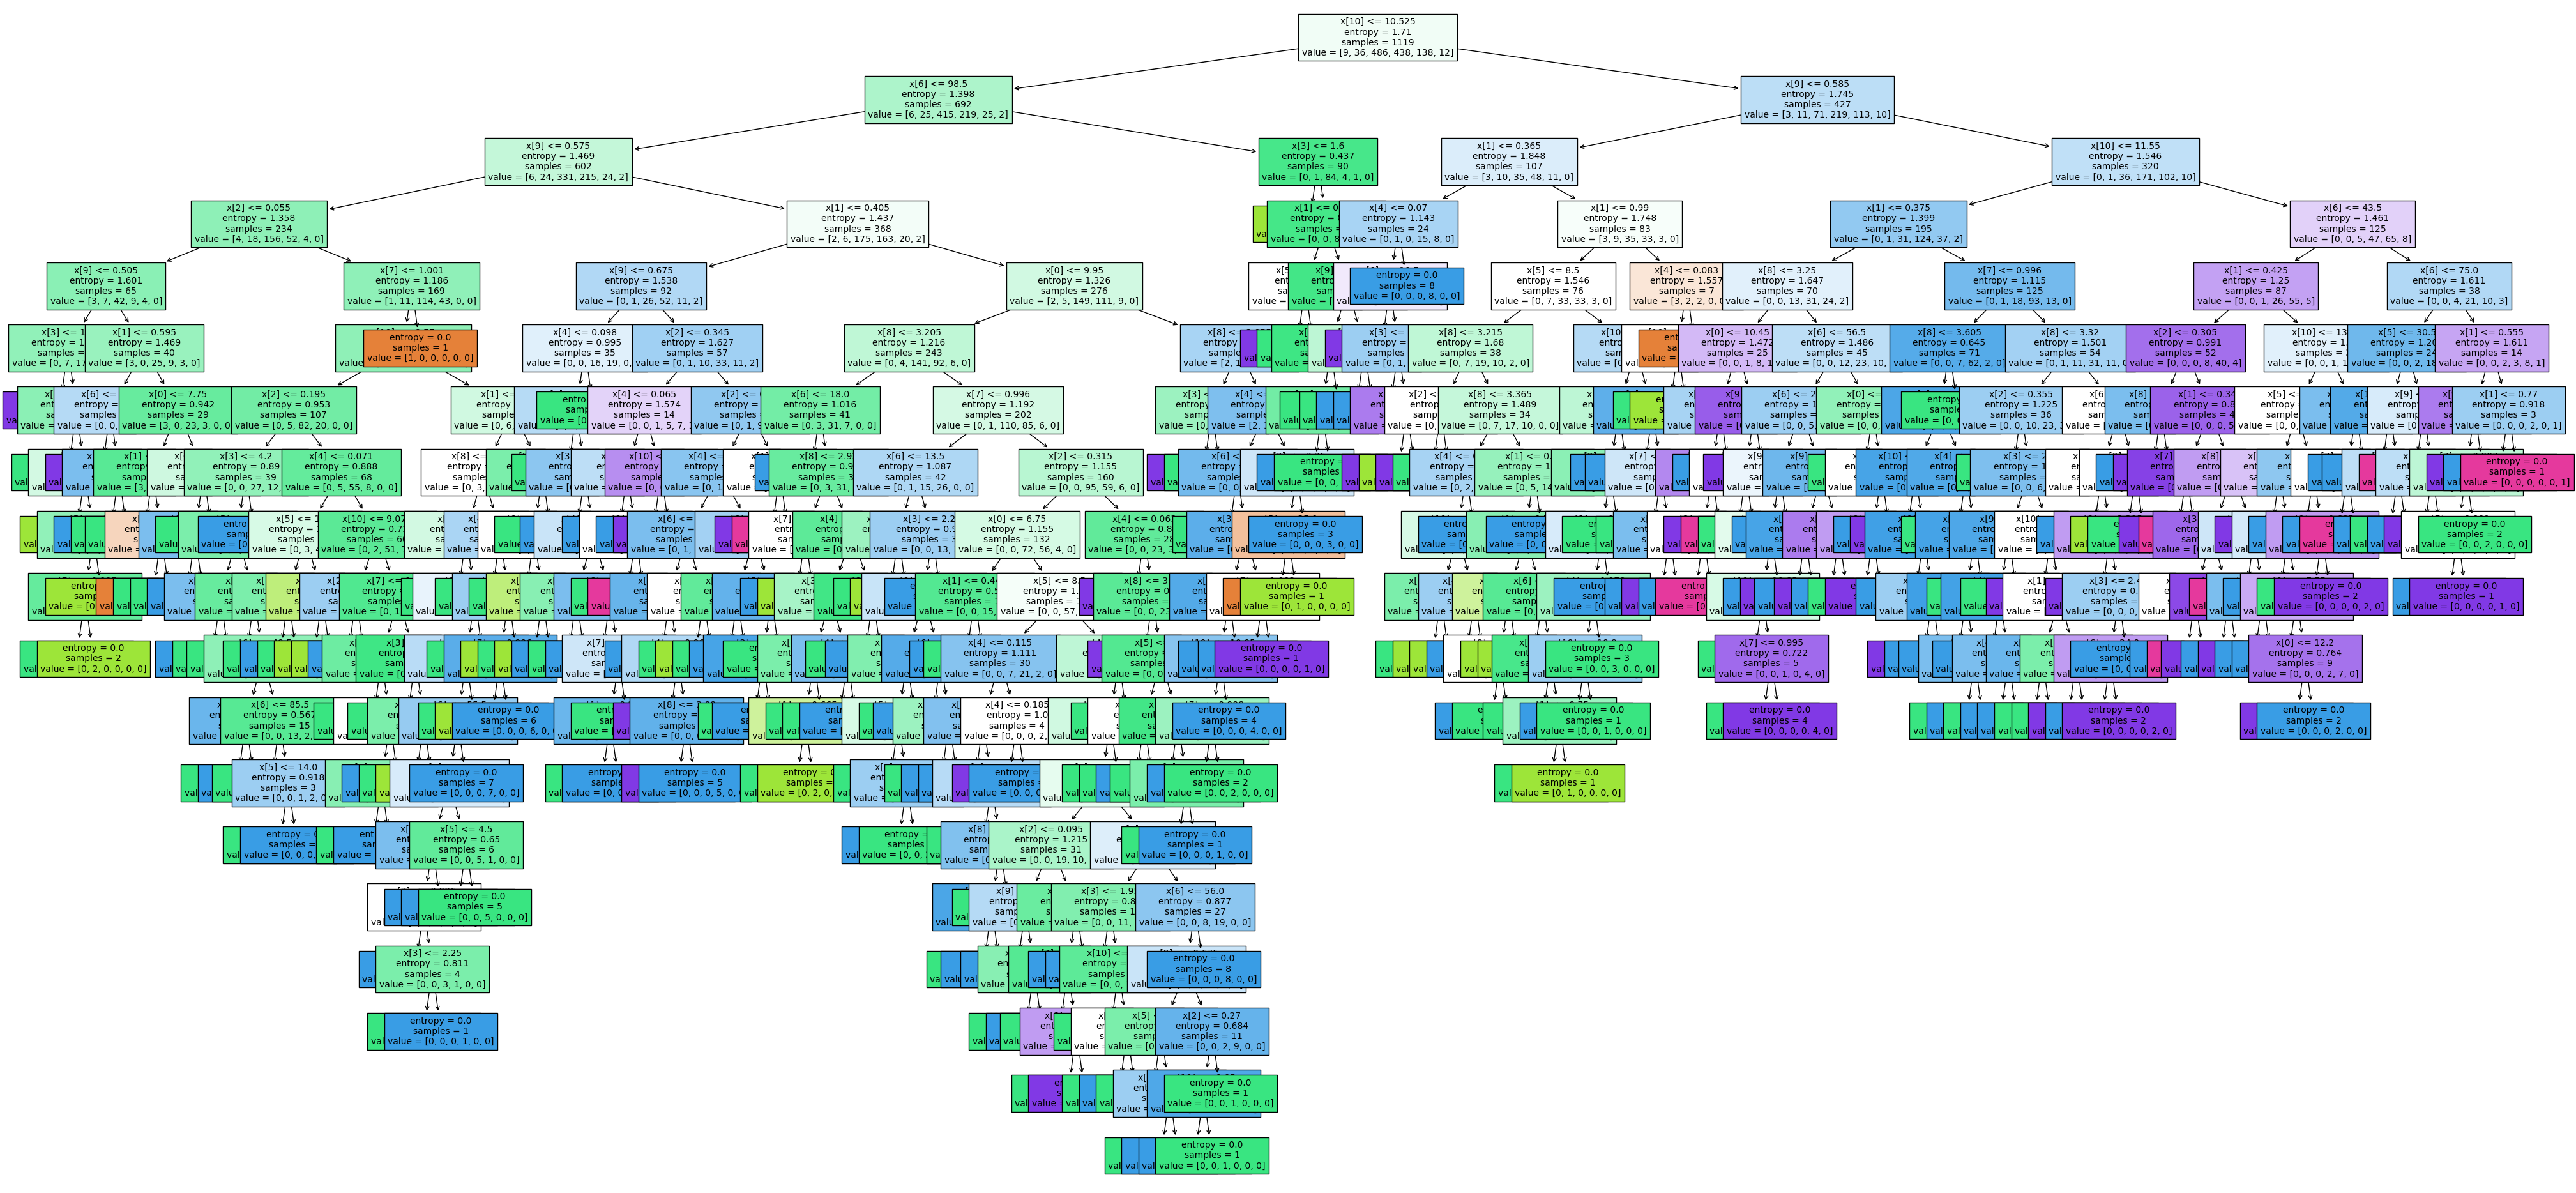

In [14]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree_cau4',dpi=100)
plt.show()

In [15]:
clf = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
tree_pred = clf.predict(x_test)
tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accruracy: 0.5625
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.64      0.62      0.63       195
           6       0.57      0.58      0.57       200
           7       0.45      0.49      0.47        61
           8       0.33      0.33      0.33         6

    accuracy                           0.56       480
   macro avg       0.34      0.35      0.35       480
weighted avg       0.56      0.56      0.56       480



In [17]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score:0.5625')

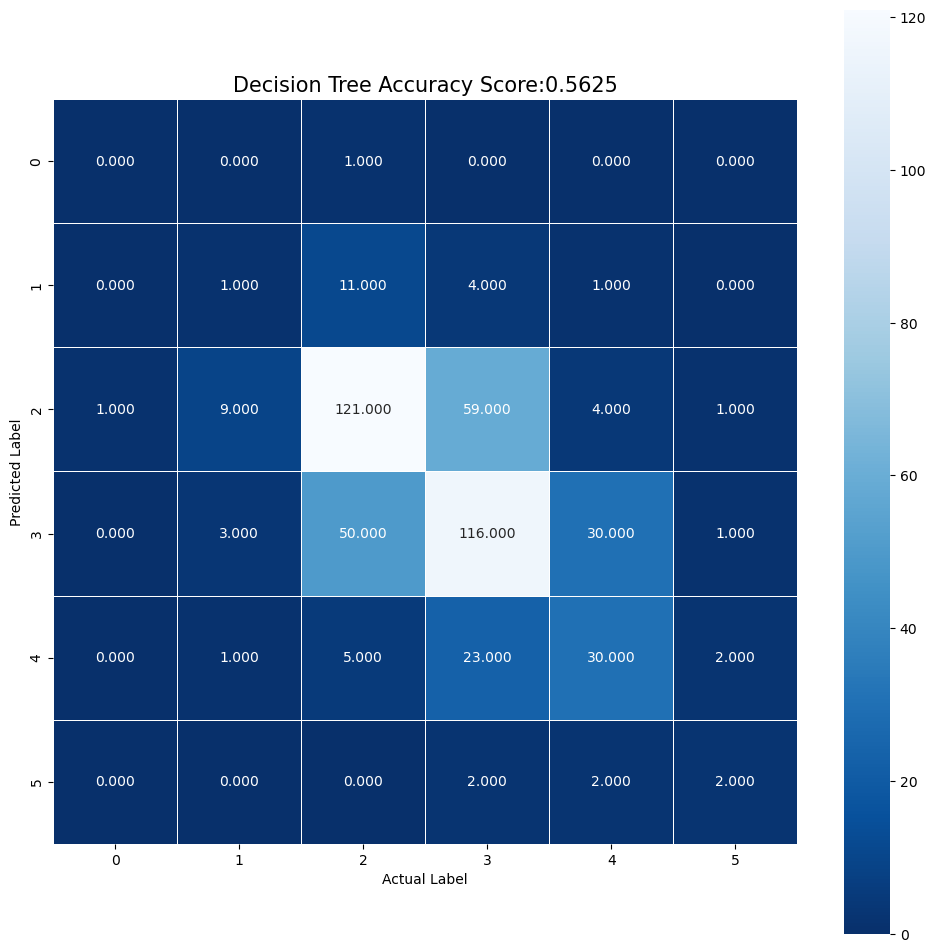

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15)

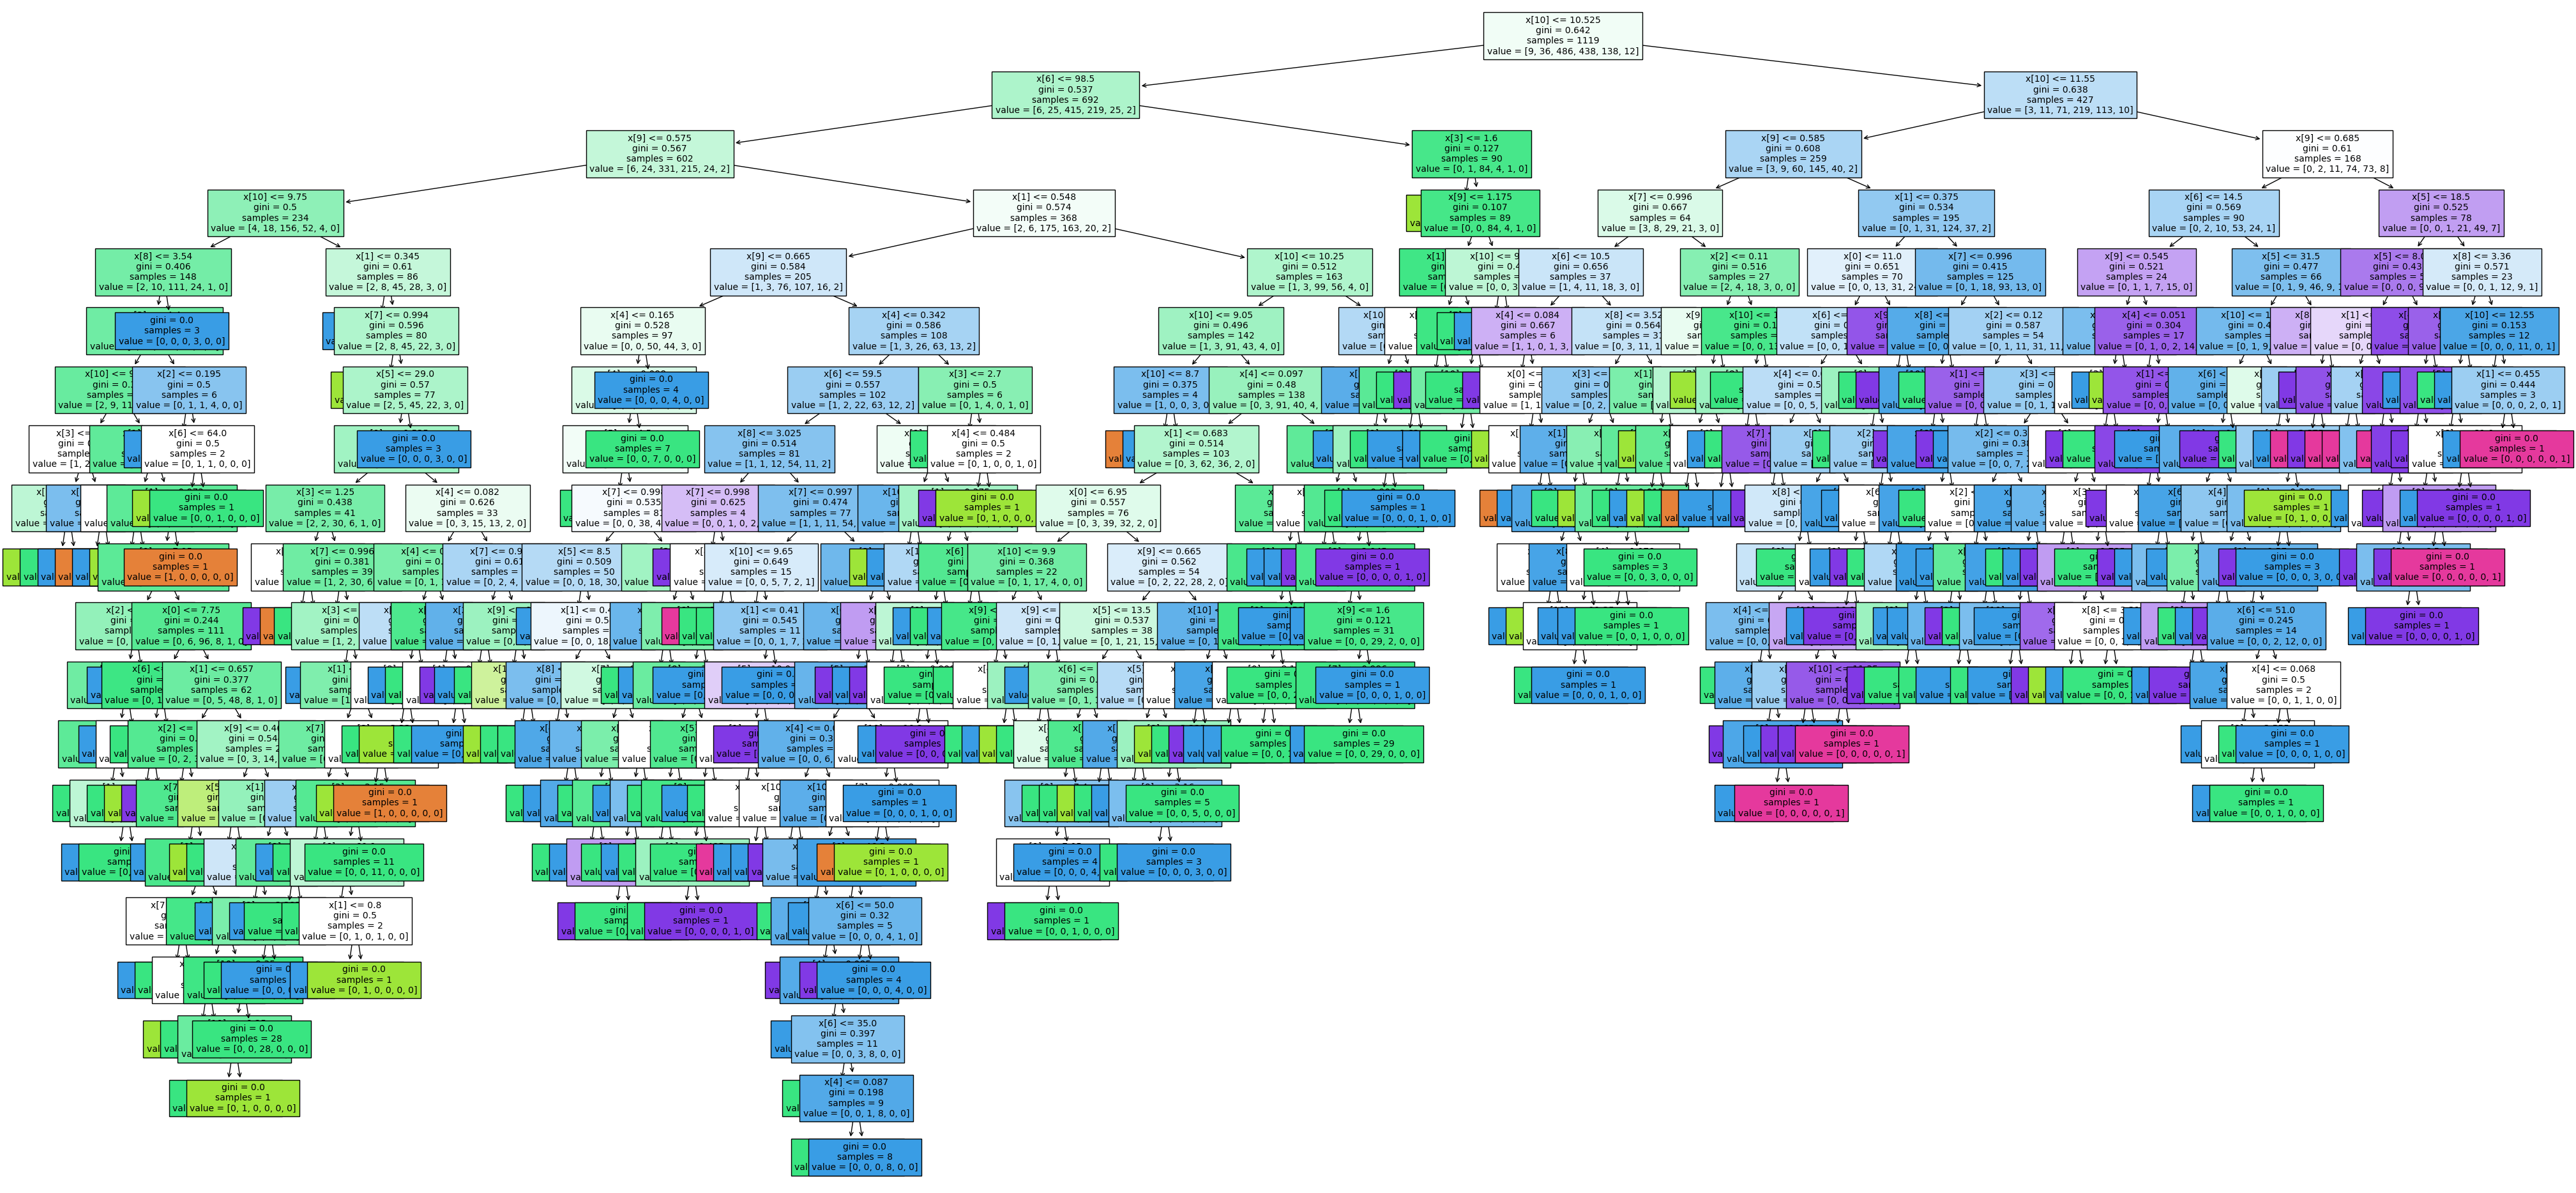

In [19]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree_cau4_gini',dpi=100)
plt.show()

In [20]:
gnb = GaussianNB()

In [21]:
bayes_pred = gnb.fit(x_train, y_train).predict(x_test)
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy: ", bayes_score)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.5416666666666666
Report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



Text(0.5, 1.0, 'Native Bayes Accuracy Score: 0.5416666666666666')

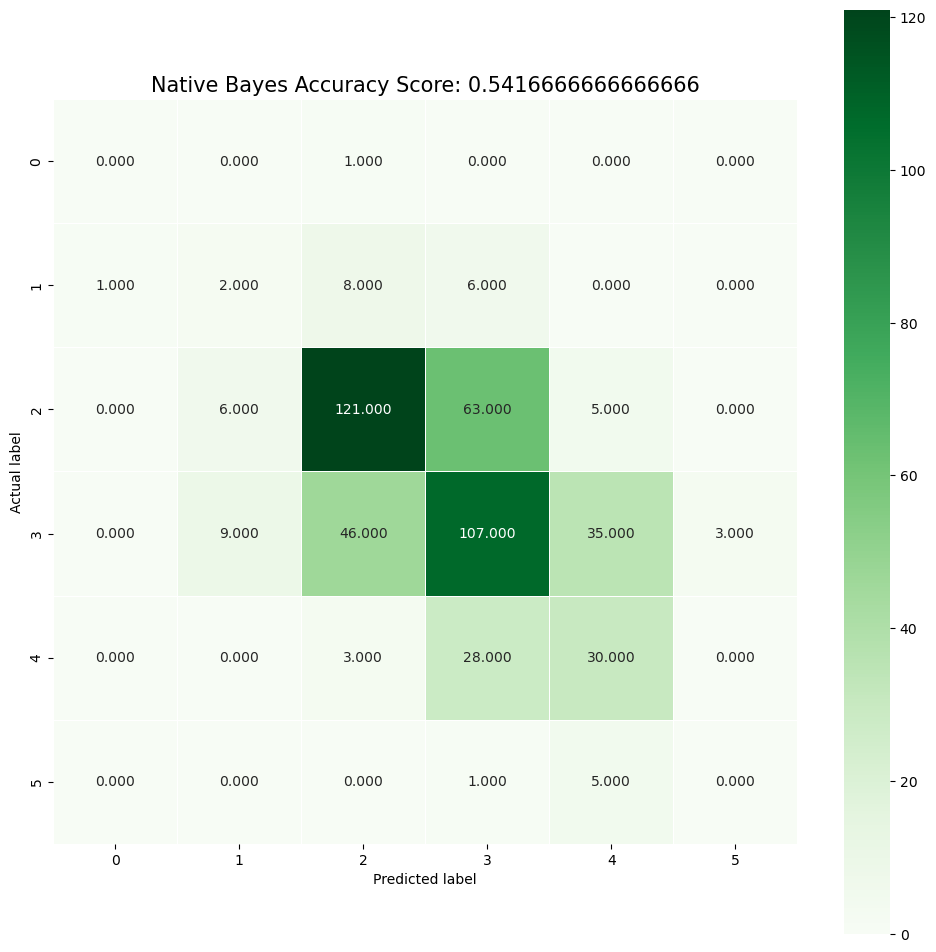

In [22]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Native Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)

In [1]:
# SO SÁNH KẾT QUẢ
#Dựa vào mô hình ta có độ chính xác của các thuật toán lần lượt là:
#Thuật toán cây ID3 với 58.34%
#Thuật toán cây CART với 56.25%
#Thuật toán Naive Bayes với 54.167%
#Vậy đối với mô hình này sử dụng thuật toán cây quyết định ID3 cho ra độ chính xác cao nhất